### Perceptron

In [21]:
import numpy as np
class Perceptron:

  def __init__(self, teta, w, n, epochs):

    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self,train_x,train_y):

    for i in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):

        u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

        r = 1 if u >= 0 else 0
        results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [22]:
############ AND

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

############ OR

#y = np.array([0, 1, 1, 1])

In [23]:
## 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 2) Treinar o AND e depois fazer o predict com a matriz x
## 3) Treinar o OR e depois fazer o predict com a matriz x

In [24]:
# 1) Inicialização dos parâmetros do Perceptron
teta_and = 0.5  # teta
w_and = [1, 1]  # pesos iniciais
n_and = 0.1  # taxa de aprendizado
epochs_and = 100  # épocas

# 2.a) Treinar o AND e depois ...
perceptron_and = Perceptron(teta_and, w_and, n_and, epochs_and)
perceptron_and.train_perceptron(x, y)

# 2.b) fazer o predict com a matriz x
test_data_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
results_and = perceptron_and.predict_perceptron(test_data_and)

print("Resultados do perceptron AND:", results_and)

Resultados do perceptron AND: [0, 0, 0, 1]


In [25]:
# 1) Inicialização dos parâmetros do Perceptron
teta_or = 0.5  # teta
w_or = [1, 1]  # pesos iniciais
n_or = 0.1  # taxa de aprendizado
epochs_or = 100  # número de épocas

# 3.a) Treinar o OR e depois ...
perceptron_or = Perceptron(teta_or, w_or, n_or, epochs_or)
perceptron_or.train_perceptron(x, np.array([0, 1, 1, 1]))

# 3.b) fazer o predict com a matriz x
test_data_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
results_or = perceptron_or.predict_perceptron(test_data_or)

print("Resultados do perceptron OR:", results_or)

Resultados do perceptron OR: [0, 1, 1, 1]


### Base de Classificação Sintética

In [26]:
## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

## 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 5) Treinar o Perceptron
## 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"

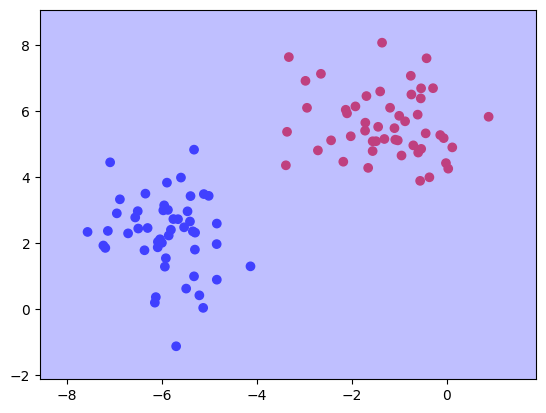

In [31]:
# 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))

# Inicialize os parâmetros do Perceptron
w = [0.02, 0.01]  # Inicializa os pesos
teta = 0.5  # Teta
epochs = 100 # Épocas

# Chame a função para plotar o dataset com o perceptron
plot_linear_classifier(x, y, w, teta)

# Mostre o gráfico
plt.show()

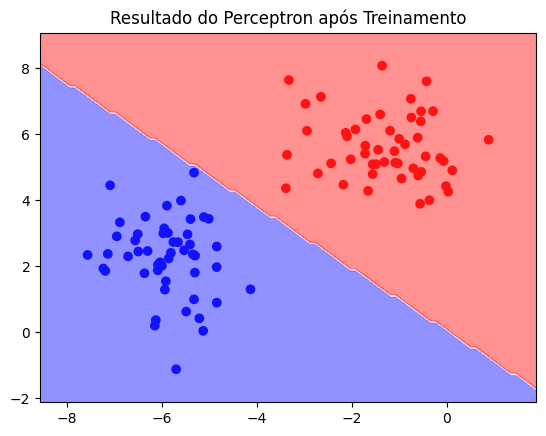

In [35]:
# 5) Treinar o Perceptron
n = 1
perceptron_model = Perceptron(teta, w, n, epochs)
perceptron_model.train_perceptron(x, y)

# Fazer previsões
predictions = perceptron_model.predict_perceptron(x)

# 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"
# Plotar o resultado após o treinamento
plot_linear_classifier(x, y, perceptron_model.w, perceptron_model.teta)
plt.title("Resultado do Perceptron após Treinamento")
plt.show()

In [37]:
from sklearn import metrics

## 7) Fazer o predict do Perceptron usando a matriz x
predictions = perceptron_model.predict_perceptron(x)

## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
accuracy = metrics.accuracy_score(y, predictions)
print("Acurácia do Perceptron: {:.2%}".format(accuracy))

Acurácia do Perceptron: 100.00%


### Dataset Sintético

(-0.1, 1.1)

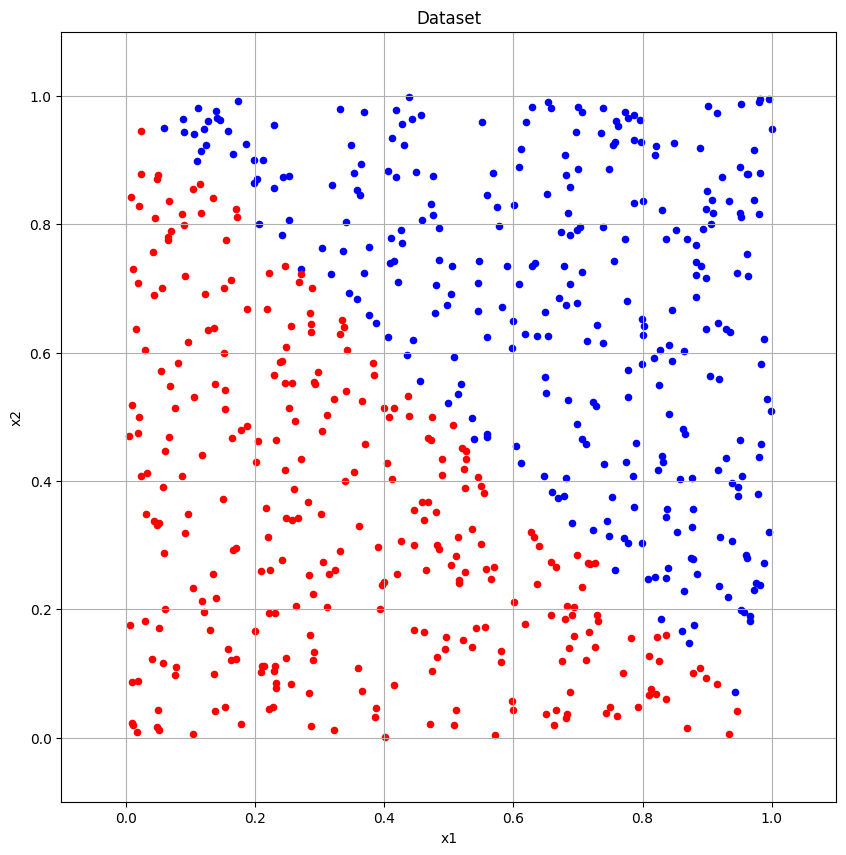

In [38]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))



#### Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [39]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

In [40]:
from sklearn.model_selection import train_test_split

## 9) Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 10) Inicializar o Perceptron com os parâmetros necessários
teta = 0.5
w = [1, 1]
n = 0.1
epochs = 100

perceptron_model = Perceptron(teta, w, n, epochs)

## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"
# Converter conjuntos de treinamento em listas
train_x = X_train.values.tolist()
train_y = y_train.values.tolist()

# Converter conjuntos de teste em listas
test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

## 12) Treinar o perceptron
perceptron_model.train_perceptron(X_train.values, y_train.values)

In [41]:
from sklearn import metrics

## 13) Fazer o predict do Perceptron usando a matriz x
predictions = perceptron_model.predict_perceptron(X.values.tolist())

## 14) Calcular a acurácia com a função: "accuracy_score" e ...
accuracy = metrics.accuracy_score(y, predictions)

## 14.b) printar o resultado
print("Acurácia do Perceptron: {:.2%}".format(accuracy))

Acurácia do Perceptron: 100.00%
